In [164]:
import numpy as np
from math import log, sqrt
import random
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
%cd '/Users/xiaoyingliu/desktop'

/Users/xiaoyingliu/Desktop


In [165]:
data=pd.read_csv('data.csv')

In [166]:
data.head()

,correct,n1,n2
0,1,5,7
1,1,4,8
2,1,1,13
3,1,3,1
4,1,1,2


In [212]:
n2=data['n2']
n1=data['n1']
a=data['correct']

In [168]:
#1. explain why we need log instead of unlog
#ANS: according to the log rule, log(a*b)=log(a)+log(b), if we use logrithm verison of posterior probability, we can add the posterior instead of do 
#complex vector multiplication on it. This will make the operation more efficient, considering we have hundreds of loops, using logrithm version is definitely
#necessary. 

In [169]:
#2. explain why the form of will avoid us from integration
#Accorning to bayes rule, p(W'|D)=p(W' and D)/p(D), while p(W|D)=p(W and D)/p(D). Both expression has a p(D) as their denominator. By dividing them we
#eliminate p(D), we do need integration to calculate p(D). In such way, we avoid doing integration.

In [213]:
#3.Write functions to compute something proportional to the log prior and log posterior in this
#model. You will prevent later frustration by ensuring that your prior correctly handles cases when W<0
#(what should it return?)
def compute_ll(n1, n2, a, W):
    #accuracy is the raw data column
    # this function takes a numpy array for n1, n2, and the accuracy (0/1), whether they answerd correctly
    # as well as W, the hypothesis
    # and returns the *log* likelihood of the responses, log P(acc | n1, n2, W)
    assert(len(n1) == len(n2) == len(a))
    ll = 0.0
    for i in range(len(n1)):
        p = 1.0-scipy.stats.norm.cdf(0, loc=abs(n1[i]-n2[i]), scale=W*sqrt(n1[i]**2 + n2[i]**2)) # the probability of answering correctly
        if a[i] == 1:
            ll += log(p) if p > 0.0 else float("-inf")
        elif a[i] == 0:
            ll += log(1.0-p) if p < 1.0 else float("-inf")
        else:
            assert(False, "a[i] must be 0 or 1")
    return ll




In [214]:
def compute_prior(w):
    if w<0:
        return float("-inf")
    else:
        prior=log(st.expon.pdf(w))
        return np.sum(prior)

In [215]:
#4.
def compute_posterior(n1,n2,a,step):
    w=[]
    post=[]

    curr_w=np.random.randn()
    while(curr_w<0):
        curr_w=np.random.randn()
    curr_prior=compute_prior(curr_w)
    curr_ll=log_likelihood(n1,n2,a,curr_w)
    curr_post=curr_prior+curr_ll
    
    for i in range(step):
        prop_w=curr_w+np.random.randn()*0.05 
        prop_prior=compute_prior(prop_w)
        prop_ll=compute_ll(n1,n2,a,prop_w)
        prop_post=prop_prior+prop_ll
        
        if((prop_ll>curr_ll) or np.exp(prop_ll-curr_ll)>random.random()):
            curr_w=prop_w
            curr_prior,curr_ll,curr_post=prop_prior,prop_ll,prop_post
            
            
        if i%10==0:
            w.append(curr_w)
            post.append(curr_post)
            
        if i%500==0:
            print(i)
            
    return w,post

In [216]:
w,post=compute_posterior(n1,n2,a,300)

0


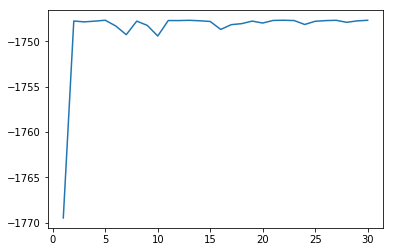

In [217]:
#4(a)
x=range(1,31)
plt.plot(x,post)
plt.show()

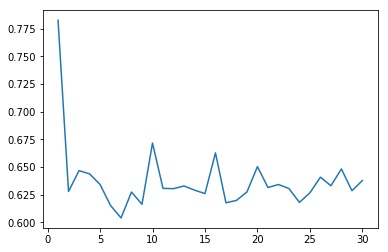

In [218]:
#4(b)
x=range(1,31)
plt.plot(x,w)
plt.show()

In [201]:
#4(c)a histogram of the samples of W over the first 10,000 samples after 1000 samples of “burn in.”
random.seed(12345)
w,post=compute_posterior(n1,n2,a,10000)

0


KeyboardInterrupt: 

In [147]:
#test cell
w_10000=w
w_without_burn_in=w_10000[100:1000]

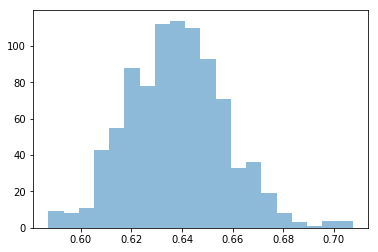

In [149]:
plt.hist(w_without_burn_in,bins=20,alpha=0.5)
plt.show()

In [219]:
#5. Use your sampler to determine the probability that W is in the interval [0.2,0.3]. What is that
#probability?
def interval_prob(w):
    count=0
    for i in w:
        if i>=0.2 and i<=0.3:
            count+=1
    return count/len(w)      

In [220]:
w

[0.7826025799446529,
 0.6279567980669869,
 0.6467615544219041,
 0.643876595746997,
 0.6343203966631451,
 0.6153158573527281,
 0.6040577935933036,
 0.6274361564147847,
 0.6163817805220014,
 0.6716631650259177,
 0.6307665008716936,
 0.6304760396933744,
 0.632926229394627,
 0.629176372591143,
 0.6260138167475462,
 0.6627861161639275,
 0.6177157048552884,
 0.6198843727194887,
 0.6275389205876486,
 0.6503896319767455,
 0.6315630040134624,
 0.6342392149728285,
 0.6306168340833503,
 0.6180882668777383,
 0.6267768872718852,
 0.6408623687815106,
 0.6331096794141831,
 0.6482790946701353,
 0.6286318338244393,
 0.6378303243703362]

In [221]:
interval_prob(w)

0.0

In [222]:
# 6. 
random.seed(567)
#(a) a simulation that tries both of these options (you'll want to run more than one
#time!) 
#option 1: one chain for 200 steps
w_200,post_200=compute_posterior(n1,n2,a,200)
#option 2: two chains and 100 step for each
w_f100,post_f100=compute_posterior(n1,n2,a,100)
w_s100,post_s100=compute_posterior(n1,n2,a,100)
w_100=w_f100+w_s100
post_100=post_f100+post_s100


0
0
0


In [140]:
#(b) #the higher the avg posterior is, the better.just compare the avg posterior
avg_post_200=sum(post_200)/len(post_200)
avg_post_100=sum(post_100)/len(post_100)
avg_post_200

-1926.6038021690547

In [141]:
avg_post_100

-2143.0432620022425

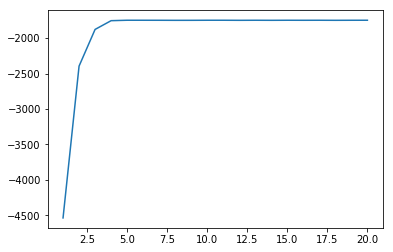

In [142]:
#visualization of two options
#option1 :
x=range(1,21)
plt.plot(x,post_200)
plt.show()

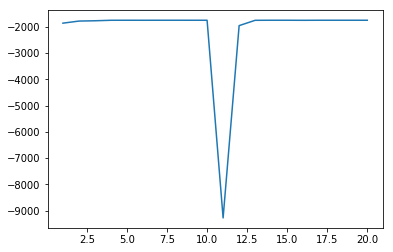

In [143]:
#option2:
x=range(1,21)
plt.plot(x,post_100)
plt.show()

In [ ]:
#Since the higher the avg posterior is, the better the estimate is. According to the visualization, option1 aka running one chain for 200 steps is better. 